In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("data.csv")
data.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [38]:
data['genre'].unique()

array(['pop', 'rock, pop', 'pop, country', 'rock, metal',
       'hip hop, pop, R&B', 'hip hop', 'pop, rock', 'pop, R&B',
       'Dance/Electronic', 'pop, Dance/Electronic',
       'rock, Folk/Acoustic, easy listening', 'metal', 'hip hop, pop',
       'R&B', 'pop, latin', 'Folk/Acoustic, rock',
       'pop, easy listening, Dance/Electronic', 'rock',
       'rock, blues, latin', 'pop, rock, metal', 'rock, pop, metal',
       'hip hop, R&B', 'pop, Folk/Acoustic', 'set()',
       'hip hop, pop, latin', 'hip hop, Dance/Electronic',
       'hip hop, pop, rock', 'World/Traditional, Folk/Acoustic',
       'Folk/Acoustic, pop', 'rock, easy listening',
       'World/Traditional, hip hop', 'hip hop, pop, R&B, latin',
       'rock, blues', 'rock, R&B, Folk/Acoustic, pop', 'latin',
       'pop, R&B, Dance/Electronic', 'World/Traditional, rock',
       'pop, rock, Dance/Electronic', 'pop, easy listening, jazz',
       'rock, Dance/Electronic', 'World/Traditional, pop, Folk/Acoustic',
       'countr

In [40]:
genre = 'pop'
data[data['genre']==genre]

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
10,Gigi D'Agostino,L'Amour Toujours,238759,False,2011,1,0.617,0.728,7,-7.932,1,0.0292,0.0328,0.048200,0.3600,0.808,139.066,pop
11,Eiffel 65,Move Your Body - Gabry Ponte Original Radio Edit,268863,False,1999,56,0.745,0.958,7,-9.664,1,0.0287,0.0813,0.324000,0.5330,0.960,129.962,pop
12,Bomfunk MC's,Freestyler,306333,False,2000,55,0.822,0.922,11,-5.798,0,0.0989,0.0291,0.325000,0.2520,0.568,163.826,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,Ed Sheeran,Cross Me (feat. Chance the Rapper & PnB Rock),206186,True,2019,64,0.746,0.787,4,-6.373,1,0.1200,0.2140,0.000000,0.0669,0.607,95.005,pop
1990,Sam Smith,How Do You Sleep?,202204,False,2019,73,0.477,0.682,1,-4.931,0,0.0925,0.1530,0.000000,0.0763,0.345,110.567,pop
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop


In [41]:
unique_countries = data[data.popularity>0]['artist'].unique()
unique_countries.sort()
unique_countries

array(['*NSYNC', '112', '2 Chainz', '21 Savage', '2Pac', '3 Doors Down',
       '3LW', '3OH!3', '5 Seconds of Summer', '50 Cent', '6ix9ine',
       '99 Souls', 'A Boogie Wit da Hoodie', 'A$AP Ferg', 'A$AP Rocky',
       'A.R. Rahman', 'A1', 'AJ Tracey', 'AWOLNATION', 'Aaliyah',
       'Adam Lambert', 'Adele', 'Afroman', 'Agnes', 'Akon', 'Alan Walker',
       'Alanis Morissette', 'Alec Benjamin', 'Alesha Dixon',
       'Alessia Cara', 'Alesso', 'Alex & Sierra', 'Alex Clare',
       'Alex Gaudino', 'Alexandra Burke', 'Alice Deejay', 'Alicia Keys',
       'Alien Ant Farm', 'All Saints', 'All Time Low', 'Aloe Blacc',
       'Alok', 'Amanda Perez', 'Amerie', 'Amy Winehouse', 'Anastacia',
       'Angie Martinez', 'Anne-Marie', 'Anuel AA', 'Arctic Monkeys',
       'Ariana Grande', 'Armand Van Helden', 'Armin van Buuren',
       'Ashanti', 'Asher Roth', 'Ashlee Simpson', 'Ashley O',
       'Atomic Kitten', 'Audioslave', 'Ava Max', 'Avant', 'Avicii',
       'Avril Lavigne', 'Ayo & Teo', 'B Youn

In [42]:
country_popularity_case = []
for i in unique_countries:
  country_popularity_case.append(data[data.popularity>0][data['artist']==i][data['genre']==genre].popularity.sum())

<ipython-input-42-b50d886fbbe2>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  country_popularity_case.append(data[data.popularity>0][data['artist']==i][data['genre']==genre].popularity.sum())


In [43]:
print(set(zip(unique_countries, country_popularity_case)))

{('MIKA', 126), ('Outkast', 0), ('Playboi Carti', 0), ('Madison Avenue', 0), ('Major Lazer', 0), ('Lil Jon', 0), ('M.I.A.', 0), ('Sofía Reyes', 0), ('Rob Thomas', 0), ('Samantha Mumba', 43), ('Ashanti', 0), ('Fifth Harmony', 210), ('Sidney Samson', 0), ('Lasgo', 65), ('Alien Ant Farm', 0), ('Trey Songz', 0), ('Pixie Lott', 0), ('Timbaland', 0), ('MKTO', 0), ('Keane', 59), ('Kelly Clarkson', 0), ('Delta Goodrem', 108), ('Route 94', 0), ('Bob Sinclar', 0), ('Lil Dicky', 0), ('Default', 0), ('Cassie', 0), ('Fergie', 0), ('Twenty One Pilots', 0), ('John Legend', 0), ('Rihanna', 0), ('Lemaitre', 59), ("Lil' Flip", 0), ('Natalie La Rose', 0), ('Arctic Monkeys', 0), ('Disclosure', 0), ('Five', 47), ('Duffy', 0), ('Logic', 0), ('Christina Milian', 0), ('Cam’ron', 0), ('Montell Jordan', 0), ('Finger Eleven', 0), ('21 Savage', 0), ('Madonna', 485), ('The Weeknd', 0), ('A$AP Rocky', 0), ('BTS', 35), ('Ne-Yo', 0), ('Room 5', 0), ('blackbear', 0), ('Klingande', 0), ('Natasha Bedingfield', 64), ('Fu

In [44]:
unique_song = data['song'][data.popularity>1].unique()
unique_song

array(['Oops!...I Did It Again', 'All The Small Things', 'Breathe', ...,
       'The Git Up', 'Dancing With A Stranger (with Normani)', 'Circles'],
      dtype=object)

In [48]:
province_confirmed_case = []
for i in unique_song:
  province_confirmed_case.append(data[data.popularity>0][data['song']==i][data['genre']==genre].popularity.sum())

<ipython-input-48-07eac5a9e317>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  province_confirmed_case.append(data[data.popularity>0][data['song']==i][data['genre']==genre].popularity.sum())


In [49]:
print(set(zip(unique_song, province_confirmed_case)))

{('Alarm', 0), ('Mockingbird', 0), ('Love Me Like You Do - From "Fifty Shades Of Grey"', 0), ('Want U Back', 0), ('Work It', 0), ('Life Is A Rollercoaster', 0), ('Reload - Radio Edit', 0), ('Good Girls Go Bad (feat. Leighton Meester)', 0), ('Gold', 0), ('I Like The Way - Radio Edit', 0), ('One Last Breath - Radio Version', 0), ('Look What You Made Me Do', 76), ('Viva La Vida', 0), ('Supermassive Black Hole', 0), ('Control Myself', 0), ('24K Magic', 78), ('Nevermind', 74), ('Separated', 0), ("He Can't Love U", 0), ('One Step At a Time', 0), ("It Ain't Me (with Selena Gomez)", 0), ("Acceptable in the 80's", 0), ('Hey There Delilah', 78), ('As Long As You Love Me', 67), ('Corazón (feat. Nego do Borel)', 0), ('Love Me Again', 0), ('Nonstop', 0), ("This Ain't a Love Song", 0), ('Something', 65), ('Faded', 0), ("Ain't My Fault", 0), ('Dakota', 0), ('Blame It', 0), ('Shake It Off', 79), ('Shake That', 0), ('All I Have (feat. LL Cool J)', 0), ('Gimme That', 0), ("Damn! (feat. Lil' Jon) - Club 

In [50]:
nan_indices = []
for i in range(len(unique_song)):
  if type(unique_song[i])==float:
    nan_indices.append(i)

In [51]:
unique_song = list(unique_song)
province_confirmed_case = list(province_confirmed_case)

In [52]:
for i in nan_indices:
  unique_song.pop(i)
  province_confirmed_case.pop(i)

unique_song

['Oops!...I Did It Again',
 'All The Small Things',
 'Breathe',
 "It's My Life",
 'Bye Bye Bye',
 'Thong Song',
 'The Real Slim Shady',
 'Rock DJ',
 'Say My Name',
 'Lady - Hear Me Tonight',
 'Move Your Body - Gabry Ponte Original Radio Edit',
 'Freestyler',
 'Desert Rose',
 'Never Be The Same Again',
 'Try Again',
 "I'm Outta Love - Radio Edit",
 'Better Off Alone',
 'The Riddle',
 'The Next Episode',
 'In the End',
 'Sexbomb',
 'It Feels So Good',
 'Cold as Ice',
 'I Turn To You',
 'Take A Look Around',
 'Sandstorm',
 "What'chu Like (feat. Tyrese)",
 'The Time Is Now',
 "Don't Give Up",
 'Party Up',
 'Dance with Me',
 'Music',
 'No More',
 'Born to Make You Happy',
 'Get It On Tonite',
 'Spinning Around',
 "Big Pimpin'",
 'I Need You',
 'Separated',
 'Be With You',
 "He Wasn't Man Enough",
 'Bounce With Me (feat. Xscape) - Edited Album Version',
 'Forgot About Dre',
 'Hot Boyz',
 'Show Me the Meaning of Being Lonely',
 'Gotta Tell You',
 'Case Of The Ex (Whatcha Gonna Do)',
 'Shackle

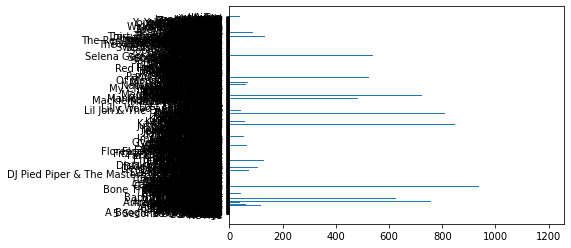

In [54]:
plt.barh(unique_countries, country_popularity_case)
plt.show()


/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


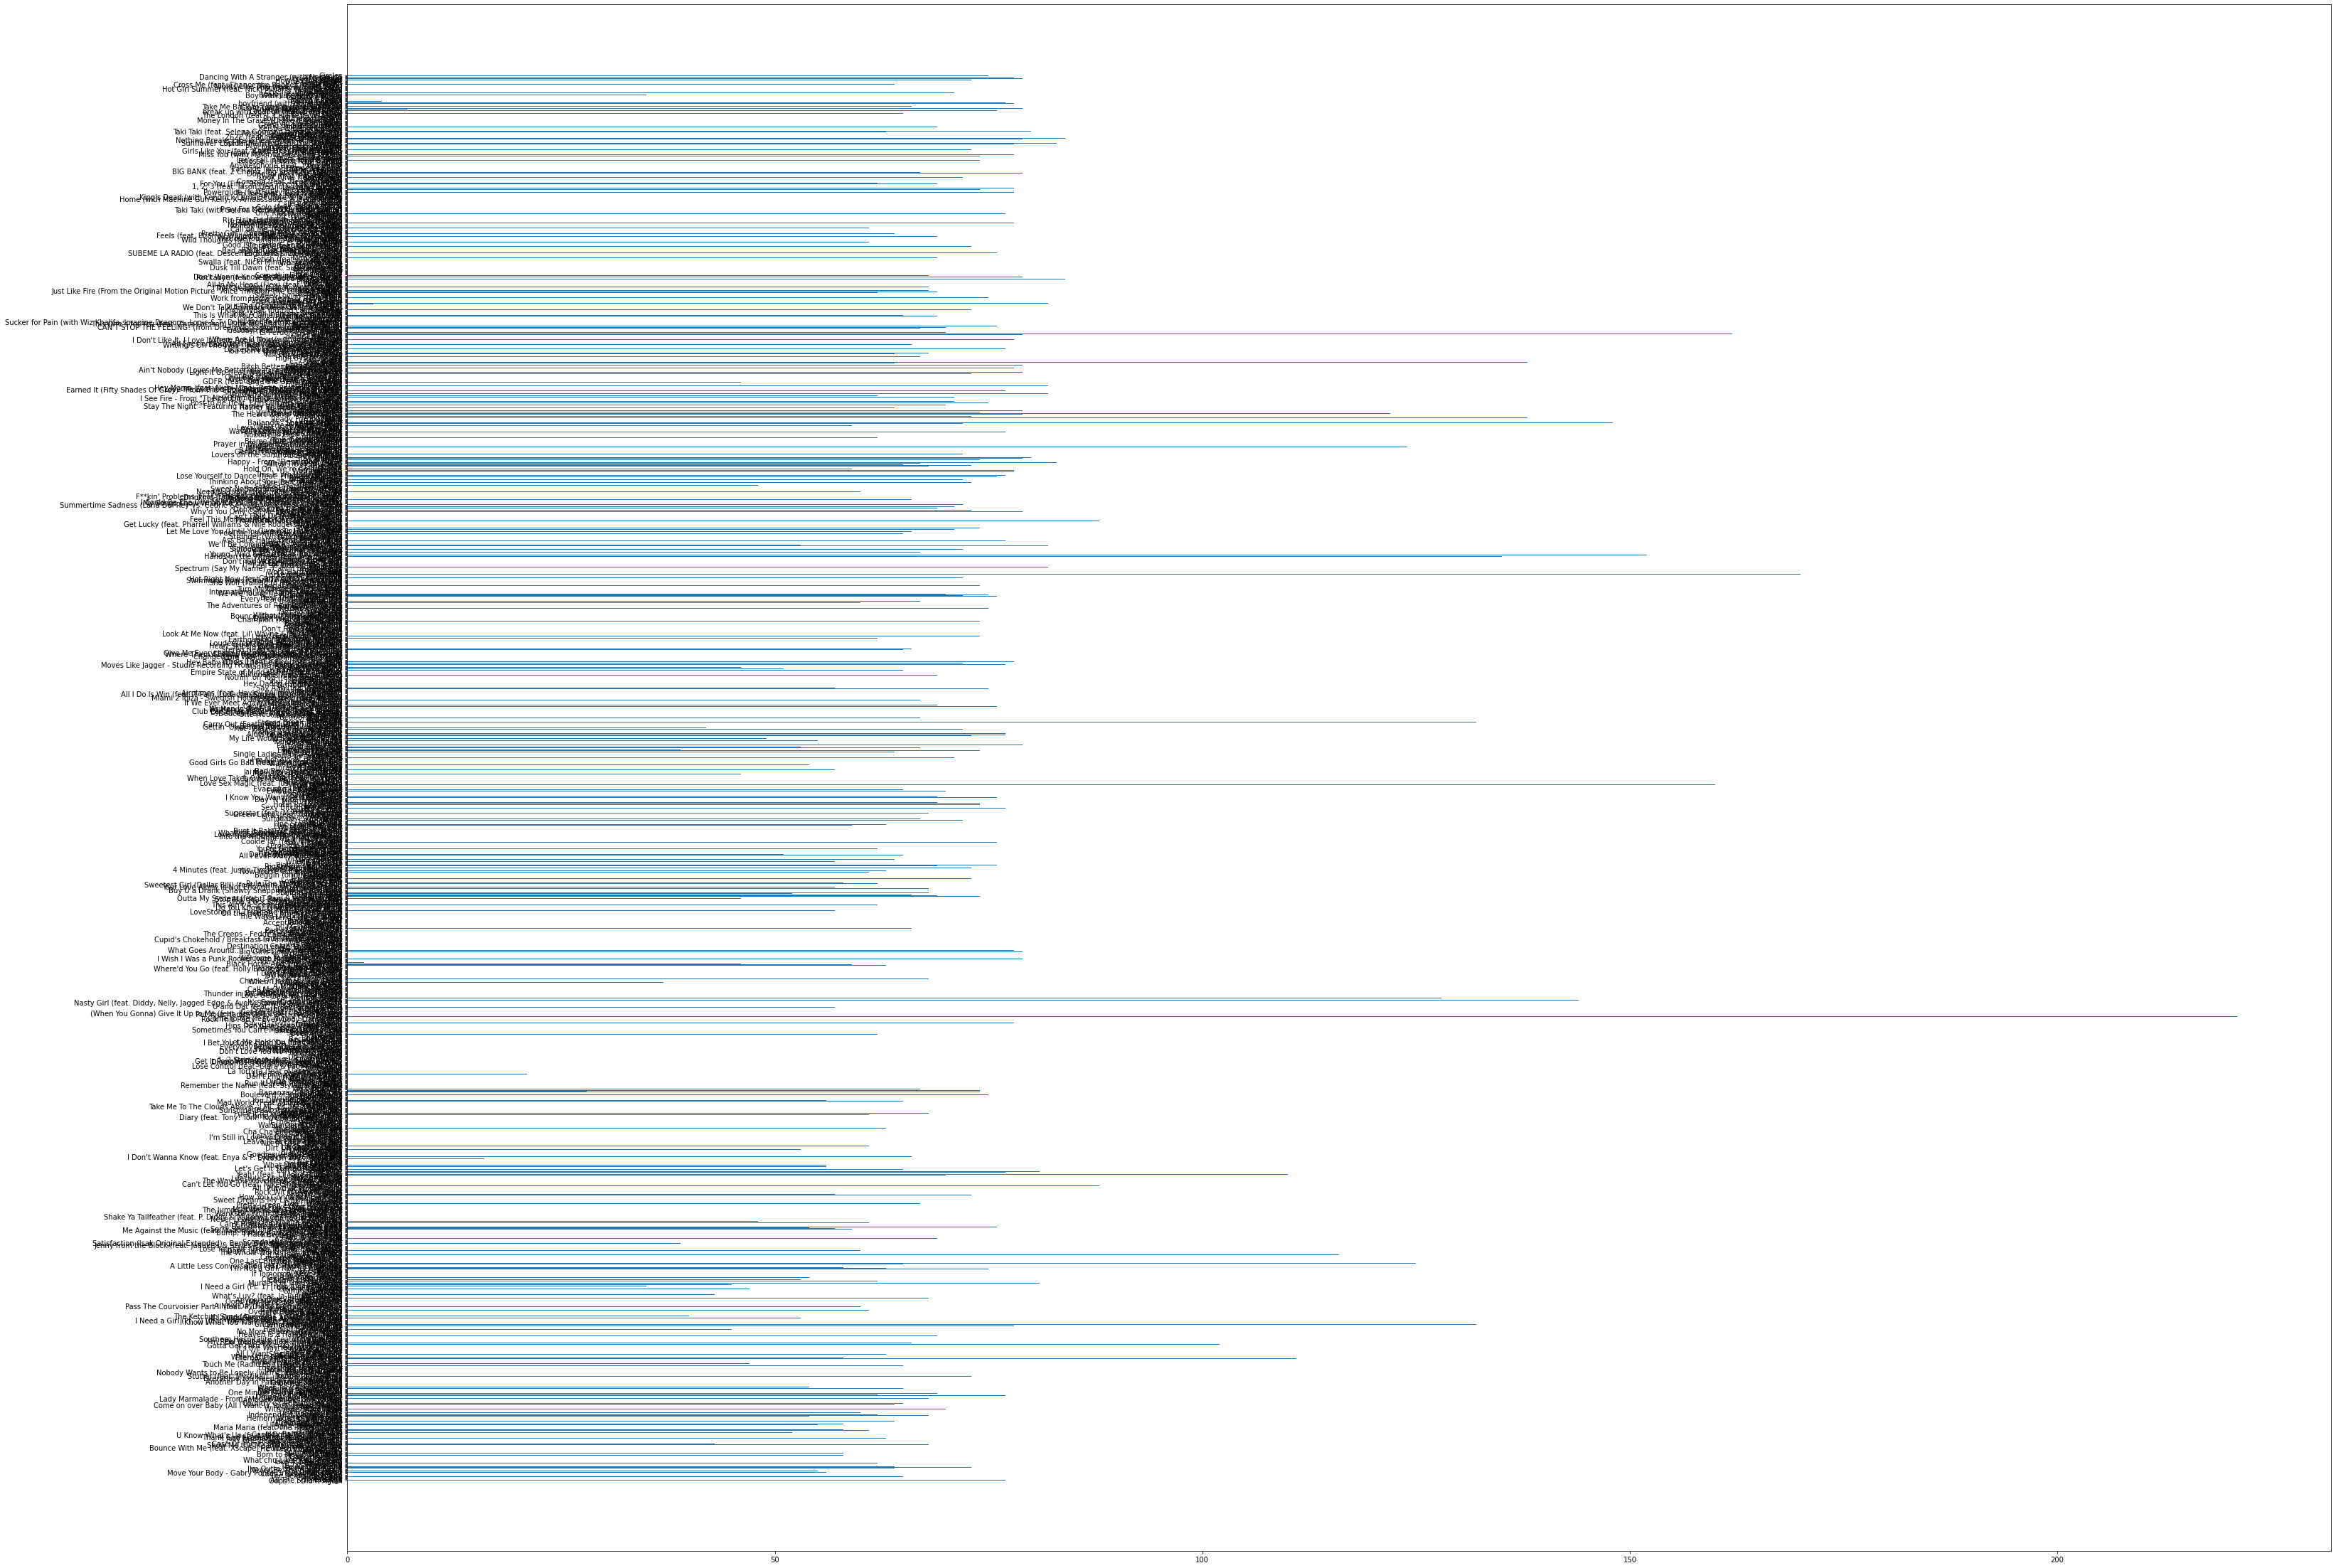

In [55]:
plt.figure(figsize=(50,40))
plt.barh(unique_song, province_confirmed_case)
plt.show()

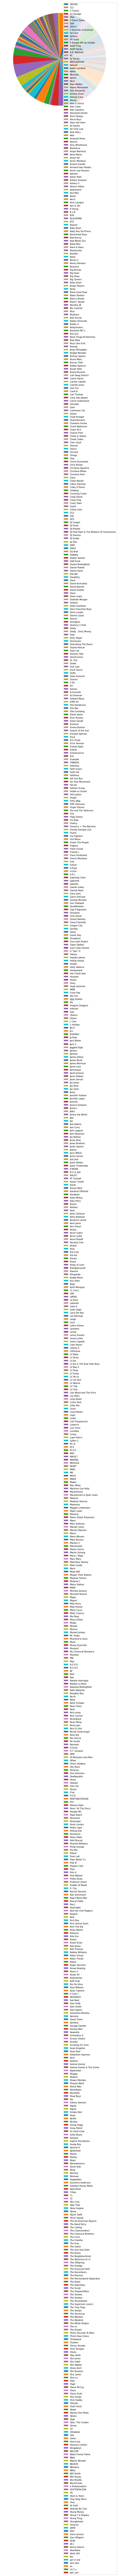

In [57]:
plt.figure(figsize=(10,10))
plt.pie(country_popularity_case)
plt.legend(unique_countries, loc='best')
plt.show()